This was an exploration of Louisiana census data by household to determine if water bills overburden residents and how common it is to have a household with a heavy water burden.  The water burden is measured as the percentage of household income used to pay the water bill.  Other variables such as household size, smartphone access were explored at the request of the project sponsor.  Towards the end an exploration of other varaibles that may correlate with higher water bills was performed.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
hla = pd.read_csv('psam_h22.csv')  # Louisiana housing data  (ACS PUMS) 
hla.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22824 entries, 0 to 22823
Columns: 234 entries, RT to WGTP80
dtypes: float64(142), int64(90), object(2)
memory usage: 40.7+ MB


In [3]:
paywat1 = hla[hla['WATFP'] == 3]  # filter for households which pay a water bill
paywat1.head()

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
2063,H,2018HU0000035,7,600,3,22,1000000,1013097,23,3,...,27,5,16,11,12,36,57,18,24,78
2064,H,2018HU0000103,7,1300,3,22,1000000,1013097,56,5,...,72,128,53,18,16,16,75,49,65,24
2065,H,2018HU0000106,7,1700,3,22,1000000,1013097,440,4,...,133,138,388,408,397,442,457,549,828,163
2066,H,2018HU0000237,7,500,3,22,1000000,1013097,127,1,...,117,121,102,133,230,133,146,52,50,139
2068,H,2018HU0000311,7,300,3,22,1000000,1013097,7,3,...,14,8,3,3,3,7,9,7,7,16


In [4]:
paywat1.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15089 entries, 2063 to 22822
Columns: 234 entries, RT to WGTP80
dtypes: float64(142), int64(90), object(2)
memory usage: 27.1+ MB


 Our dataset is now 15,089 entries limited to households paying their own water bill.

In [6]:
paywat1['WATP'].isnull().count() # no missing data

15089

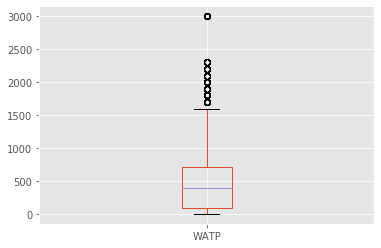

In [12]:
paywat1.boxplot(column='WATP')  #check for outliers

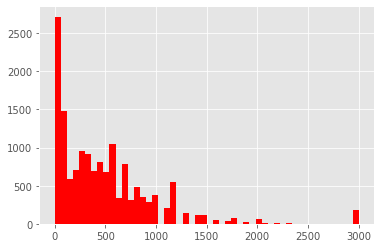

In [13]:

paywat1['WATP'].hist(bins = 50, range=[0, 3005],facecolor='red')  # frequency plot

The entries with $3000  for water bill are not continous.  Proabaly data entered as a default and needs to be cleaned.  This point needs investigating.  These entries should be discounted. 

In [4]:
paywat = paywat1[paywat1['WATP'] < 3000]

In [15]:
paywat['WATP'].describe()  # explore statistical calculations


count    14914.000000
mean       467.616334
std        408.203595
min          4.000000
25%        100.000000
50%        380.000000
75%        700.000000
max       2300.000000
Name: WATP, dtype: float64

The dataset now has 14,914 entries.  

In [16]:
round(paywat['WATP'].mean(), 2)

467.62

Characteristic # 1 average annual water cost is $467.62.

In [ ]:
 # However note the large standard deviation.  The highest quarter of households are paying over $700 a year 
 # and the lowest under $100.  That's a 85% difference.  

In [17]:
round(paywat['HINCP'].mean(), 2)

73683.86

Characteristic # 2 average annual household income is $73,683.86.

In [18]:
467.62/ 73683.86 *100    # calculate the household average water utility burden  results are under 1%

0.6346301618834844

In [19]:
round(paywat['wat_burd'].quantile(.75), 2)         # a quarter of the population has a water burden of 1.71% or more 

1.71

In [20]:
paywat['HINCP'].std()  # income  varies considerably  

79058.23293485712

In addition a few outliers can cause the mean income to be skewed.  A few high income earners like moguls in the oil industry in Louisiana or lottery winners can cause the mean to increase significantly.  Statistics in a Nutshell p. 85 notes that household income data  is often skewed by outliers and median would be a better measure to use.

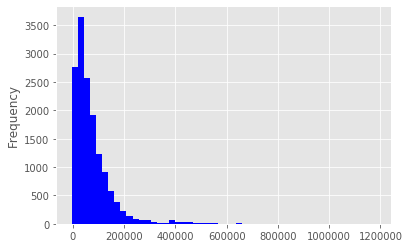

In [21]:
paywat['HINCP'].plot.hist(bins=50, facecolor ='blue')

Notice how this is not a normal distribution it skews to the right.  

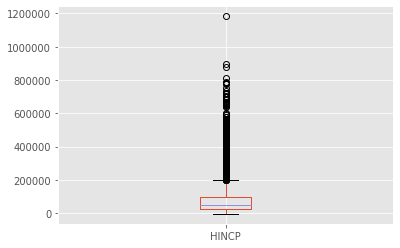

In [22]:
paywat.boxplot(column='HINCP')

Many outliers are present.

In [23]:
paywat['HINCP'].sort_values(ascending = False).head(10)  # top 10 income earners 

4822     1183000.0
3944      896000.0
17966     878000.0
6469      811950.0
15221     791000.0
16583     782800.0
4108      779900.0
3405      776000.0
20224     751000.0
18176     733400.0
Name: HINCP, dtype: float64

In [24]:
paywat['HINCP'].median()  #  huge difference between median and mean


51800.0

In [25]:
paywat['WATP'].median()   # median water bill 

380.0

In [26]:
380 / 51800 *100    # recalculate the household average water utility burden still under 1%

0.7335907335907336

We could stop here and conclude there is no problem but lets dive in deeper.  

In [27]:
hla['wat_burd'] = hla['WATP'] / hla['HINCP'] *100     # create column of water burden 

paywat[paywat['wat_burd'] < 1000]['wat_burd'].mean()  # different way of calculating the avg water burden 
                                                      #excluding the 258 that came to infinity  due to zero or negative income 

2.0309217660576495

When we calculate the average water utility burden for each household and take the mean the average is 2%.  Apparently even though the average  water bill is less than 1% of the average income there are enough families with significant water burdens to move the mean over 2%.  I prefer this method because it uses data from every household and not just the middle of the line househould.  

In [28]:
paywat['HINCP'].quantile(.25) # lower end of income spectrum 

25000.0

Many people make under 25k a year and we have to be concerned with how they will pay their water bills as they are the ones
most likely to struggle with the bill and incur the fines and fees under discussion. According to the CityLab article “The UN has identified a percentage level of household income [3%] that is a threshold for what you shouldn’t have to spend for access to clean water.”   

In [29]:
sum((paywat['HINCP'] < 25000) & (paywat['WATP'] > 500))  # number of households with under 25k of income 
                                                         # and water bills over $500

1229

In [30]:
paywat[['WATP', 'HINCP']].corr() 

,WATP,HINCP
WATP,1.000000,0.072185
HINCP,0.072185,1.000000


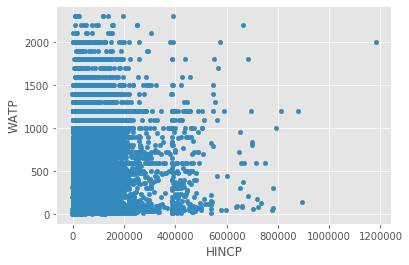

In [31]:
paywat.plot.scatter(x='HINCP',y='WATP') # income by water bill 

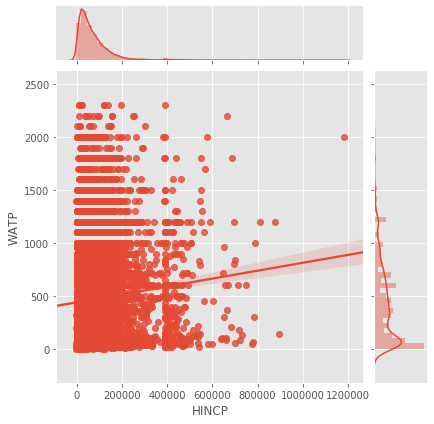

In [13]:
sns.jointplot(x='HINCP',y='WATP',data=paywat,kind='reg')

No correlation.  The lower income househoulds can have large bills. More to the point how many households have 3% water utility burden?  

In [33]:
burd = paywat[(paywat['wat_burd'] >= 3) & (paywat['wat_burd'] < 1000)]    # excluding the 258 that came to infinity 
burd['wat_burd'].count()                                                   # due to zero or negative income 
                                                                      

1873

In [34]:
round(1873/14656 *100, 2)# calculate percentage of households the total number excludes the 258 rows filtered out

12.78

In [6]:
round(15089/22823, 2) # this is proportion of households who pay a water bill


0.66

In [7]:
4660000 * .66   # population of Louisiana is 4.66 million so over 3 million people pay water bills

3075600.0

In [8]:
3075600 * .1278  # so 393,000 people have a water burden over %3

393061.68

In [36]:
burd['HINCP'].median()  

13160.0

Households with a water burden over 3% have a median income of only $13,000 a year. 

In [37]:
burd['HINCP'].max() 

73000.0

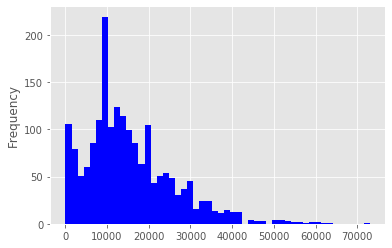

In [38]:
burd['HINCP'].plot.hist(bins = 50, facecolor = 'blue') 

In [39]:
paywat[['HINCP', 'wat_burd']].corr()

,HINCP,wat_burd
HINCP,1.000000,-0.099848
wat_burd,-0.099848,1.000000


Interestingly not a high correlation between water burden and income. 

(-1000, 40000)

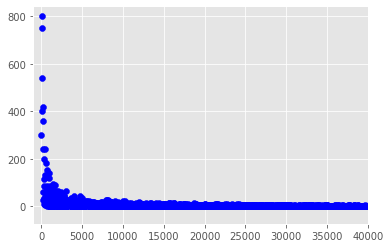

In [40]:
x=paywat['HINCP']
y= paywat['wat_burd'] 
plt.scatter(x,y, facecolor = 'blue')
plt.xlim([-1000, 40000])

Almost 400 thousand people are subject to water utility burden over 3% and as we can see the highest burdends fall on the low income households.  At an income of $40,000 a year the amount of househoulds overburdened with water bills is pretty low.  With an income under 5k a year the burden can be huge. The more variables we can identify to that help contribute to households obtaining a high water utility burden the easier it will be to build a predictive model that can help us identify households at risk and help them. 

In [41]:
round(paywat['NP'].mean(), 2)

2.35

Characteristic # 3 average  household size is 2.35.

In [42]:
paywat['NP'].describe()

count    14914.000000
mean         2.353158
std          1.329630
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: NP, dtype: float64

In [43]:
paywat[['WATP', 'NP']].corr() # no correlation household size and water bill

,WATP,NP
WATP,1.000000,0.087703
NP,0.087703,1.000000


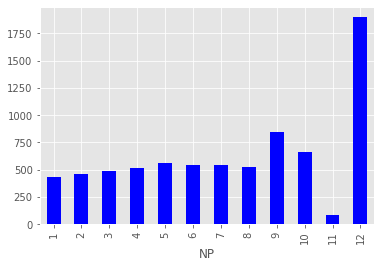

In [44]:
paywat.groupby('NP')['WATP'].mean().plot.bar(facecolor = 'blue') # avg water bill per household size

In [45]:
paywat.groupby('NP')['WATP'].mean()

NP
1      432.514967
2      455.018529
3      486.400683
4      515.204393
5      559.963225
6      542.063492
7      541.604938
8      523.421053
9      846.000000
10     661.250000
11      80.000000
12    1900.000000
Name: WATP, dtype: float64

In [47]:
paywat[paywat['NP'] > 8]['NP'].count() # how many entries for 9 or more in a household

21

Water bills do increase for larger households up until five.  Then it acutally drops which indicates household size isn't a key factor in water bills. The very large households have small sample sizes as only twenty one households have 9 or more members so its hard to infer from those catagories.  

In [48]:
paywat['SMARTPHONE'].head()     # 1 =yes 2 = no

2063    1.0
2064    1.0
2065    1.0
2066    2.0
2068    2.0
Name: SMARTPHONE, dtype: float64

In [49]:
paywat['SMARTPHONE'].value_counts() 

1.0    11879
2.0     3035
Name: SMARTPHONE, dtype: int64

In [50]:
round(11879/ 14914 *100, 2)

79.65

Characteristic # 4   79.65% of households have access to smartphones.

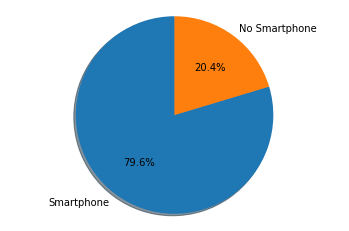

In [15]:

# Pie chart of smartphone access 
labels = 'Smartphone', 'No Smartphone'
sizes = [11879, 3035]
explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [51]:
 paywat[['WATP', 'SMARTPHONE']].corr() # smartphone access and water bills correlation is low

,WATP,SMARTPHONE
WATP,1.000000,-0.057965
SMARTPHONE,-0.057965,1.000000


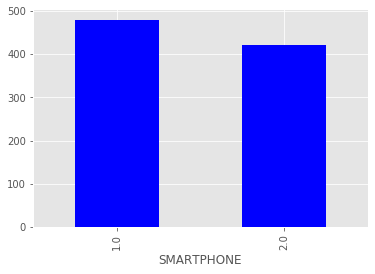

In [52]:
paywat.groupby('SMARTPHONE')['WATP'].mean().plot.bar(facecolor = 'blue') # higher water bills with smartphone

In [53]:
paywat.groupby('SMARTPHONE')['WATP'].mean()  # avg water bills by smartphone access 

SMARTPHONE
1.0    479.57589
2.0    420.80659
Name: WATP, dtype: float64

In [54]:
paywat[paywat['HINCP'] <= 25000]['SMARTPHONE'].value_counts()  # how many smartphones for those with lower income

1.0    2263
2.0    1518
Name: SMARTPHONE, dtype: int64

In [55]:
round(2263/ (2263 + 1518) *100, 2)  # percentage of lower income households with smartphones 

59.85

Plenty of low income households have access to smartphones but much less (19%) than the general population.  

In [56]:
paywat[['HINCP', 'SMARTPHONE']].corr()  #seems some correlation between income and smartphone access 

,HINCP,SMARTPHONE
HINCP,1.000000,-0.228902
SMARTPHONE,-0.228902,1.000000


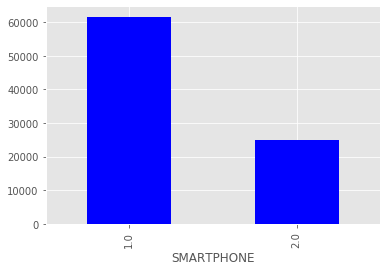

In [57]:
paywat.groupby('SMARTPHONE')['HINCP'].median().plot.bar(facecolor = 'blue')

Median income for non smartphone households is much lower than general median income and especially lower than for those with smartphones.  

Some EDA to find if any variables relate to water bills or water burdens. Household type, year built and building type had no correlation to water bills or water burden.   

In [58]:
paywat[['WATP','YBL']].corr()  # year built and water bill correlation is low 

,WATP,YBL
WATP,1.000000,-0.061129
YBL,-0.061129,1.000000


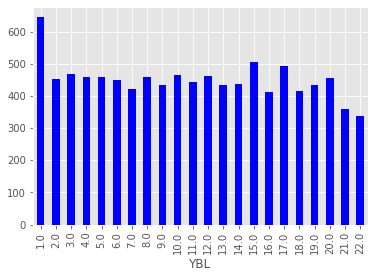

In [59]:
paywat.groupby('YBL')['WATP'].mean().plot.bar(facecolor = 'blue') # year built and avg water bill 

In [15]:
elec = paywat[(paywat['ELEFP'] == 3) & (paywat['ELEP'] != 600)] # pays electric and water bill 
                                                             #filter electric bill $600 because many discontinous entries
elec[['ELEP', 'WATP']].corr()

,ELEP,WATP
ELEP,1.000000,0.130553
WATP,0.130553,1.000000


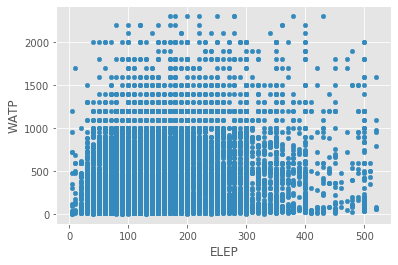

In [61]:
elec.plot.scatter(x='ELEP',y='WATP') # not a clear correlation on the scatter plot 

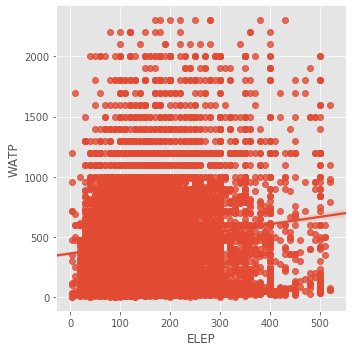

In [16]:
sns.lmplot(x='ELEP',y='WATP',data=elec,fit_reg=True) 

In [62]:
paywat[['WATP','ACR']].corr() # acres of land for household and water bill 

,WATP,ACR
WATP,1.000000,-0.133445
ACR,-0.133445,1.000000


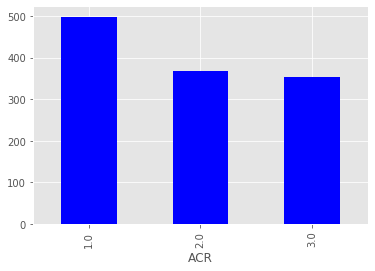

In [63]:
paywat.groupby('ACR')['WATP'].mean().plot.bar(facecolor = 'blue')

More acres per househould yields smaller water bills.  I would have guessed more acres which require watering lawns means higher water bills.  Maybe more acres is correlated to multi family dwellings.  

In [64]:
paywat[['BLD','ACR']].corr()  # building type and acres per household has a small negative correlation 

,BLD,ACR
BLD,1.000000,-0.124831
ACR,-0.124831,1.000000


In [66]:
data= paywat.groupby('BLD')['ACR'].mean()  # create series of building type and acres 

Text(0.5, 0.98, 'avg acres per building type')

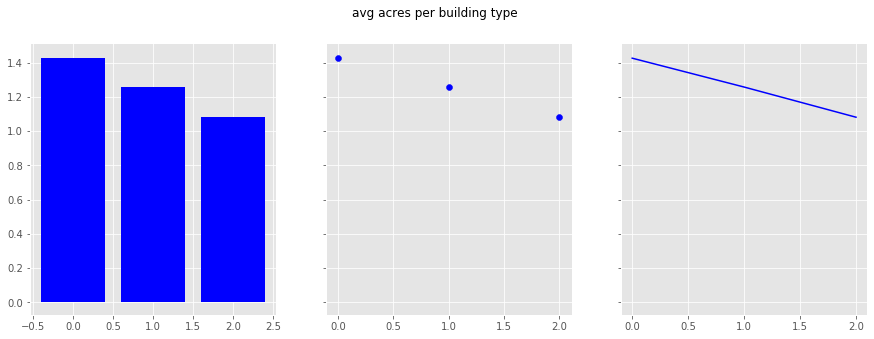

In [67]:
names =   [i for i in range(data.count())]
values =    data.dropna().unique()

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].bar(names, values, facecolor = 'blue')
axs[1].scatter(names, values, facecolor = 'blue')
axs[2].plot(names, values, 'b', label = 'ACR')
fig.suptitle('avg acres per building type')